<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231107ipynb_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. 딥러닝

    - ANN

    - 경사하강법

    - 오차역전파

    - Optimizer

    - CNN

    - ResNet

    - RNN, LSTM, GRU

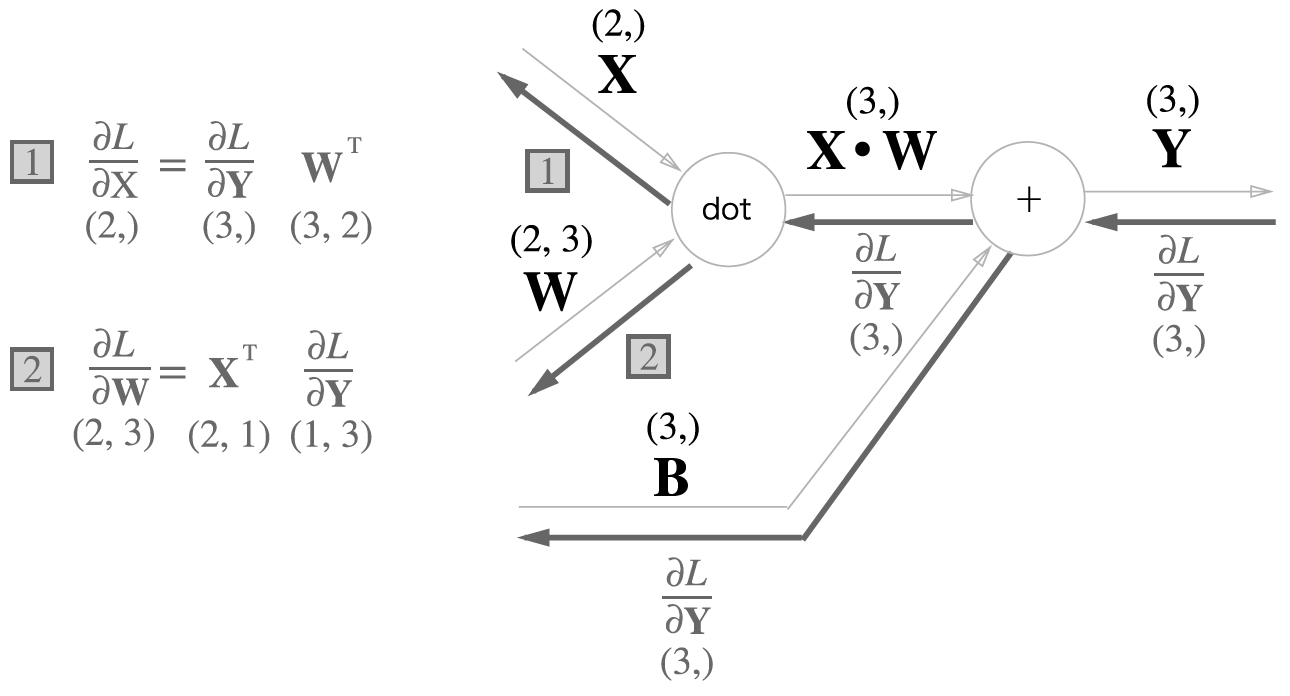

#Affine 층의 오차역전파

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

In [ ]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [ ]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
dB = np.sum(dY, axis=0)

In [ ]:
dB

array([5, 7, 9])

batch 가 없을 때

$$
\begin{pmatrix}
x_{11} & x_{12}
\end{pmatrix}
\begin{pmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{pmatrix} \\
=
\begin{pmatrix}
w_{11} x_{11}+w_{21}x_{12} & w_{12} x_{11}+w_{22}x_{12} & w_{13} x_{11}+w_{23}x_{12}
\end{pmatrix}
$$

편향 b 벡터를 더하면

$$
\begin{pmatrix}
w_{11} x_{11}+w_{12}x_{12} & w_{12} x_{11}+w_{22}x_{12} & w_{13} x_{11}+w_{23}x_{12}
\end{pmatrix} +
\begin{pmatrix}
b_{11} & b_{12} & b_{13}
\end{pmatrix}
$$

$$
\begin{pmatrix}
x_{11} & x_{12} \\
x_{21} & x_{22} \\
\cdots & \cdots \\
x_{n1} & x_{n2}
\end{pmatrix}
\begin{pmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{pmatrix} \\
=
\begin{pmatrix}
w_{11} x_{11}+w_{12}x_{12} & w_{12} x_{11}+w_{22}x_{12} & w_{13} x_{11}+w_{23}x_{12} \\
w_{11} x_{21}+w_{12}x_{22} & w_{12} x_{21}+w_{22}x_{22} & w_{13} x_{21}+w_{23}x_{22} \\
\cdots & \cdots & \cdots \\
w_{11} x_{n1}+w_{12}x_{n2} & w_{12} x_{n1}+w_{22}x_{n2} & w_{13} x_{n1}+w_{23}x_{n2} \\
\end{pmatrix}
$$

편향 b 벡터를 더하면

$$
\begin{pmatrix}
w_{11} x_{11}+w_{12}x_{12} & w_{12} x_{11}+w_{22}x_{12} & w_{13} x_{11}+w_{23}x_{12} \\
w_{11} x_{21}+w_{12}x_{22} & w_{12} x_{21}+w_{22}x_{22} & w_{13} x_{21}+w_{23}x_{22} \\
\cdots & \cdots & \cdots \\
w_{11} x_{n1}+w_{12}x_{n2} & w_{12} x_{n1}+w_{22}x_{n2} & w_{13} x_{n1}+w_{23}x_{n2} \\
\end{pmatrix} +
\begin{pmatrix}
b_{11} & b_{12} & b_{13}\\
b_{11} & b_{12} & b_{13}\\
\cdots & \cdots & \cdots \\
b_{11} & b_{12} & b_{13}\\
\end{pmatrix}
$$

$$
\begin{pmatrix}
b_{11} & b_{12} & b_{13}
\end{pmatrix} \quad \overset{repeat} ⟹ \quad
\begin{pmatrix}
b_{11} & b_{12} & b_{13}\\
b_{11} & b_{12} & b_{13}\\
\cdots & \cdots & \cdots \\
b_{11} & b_{12} & b_{13}\\
\end{pmatrix}
$$

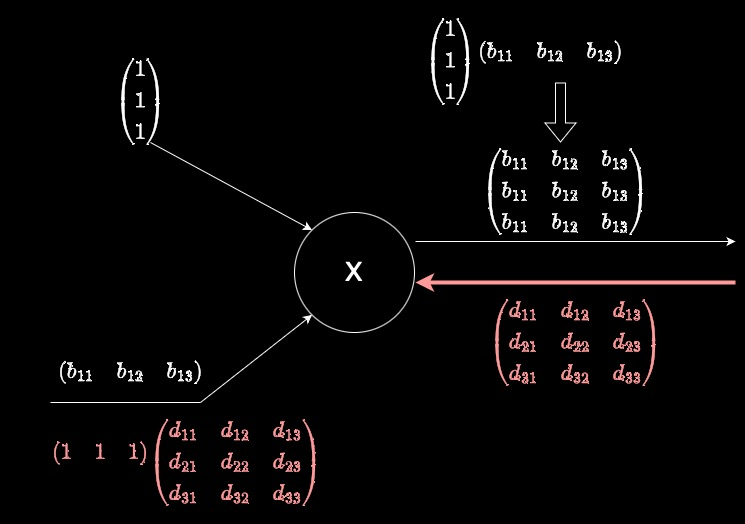

$$
\begin{pmatrix}
1 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
d_{11} & d_{12} & d_{13}\\
d_{21} & d_{22} & d_{23}\\
d_{31} & d_{32} & d_{33}\\
\end{pmatrix} = \begin{pmatrix}
d_{11} + d_{21} + d_{31} & d_{12} + d_{22} +d_{32} & d_{13} + d_{23} + d_{33}
\end{pmatrix}
$$


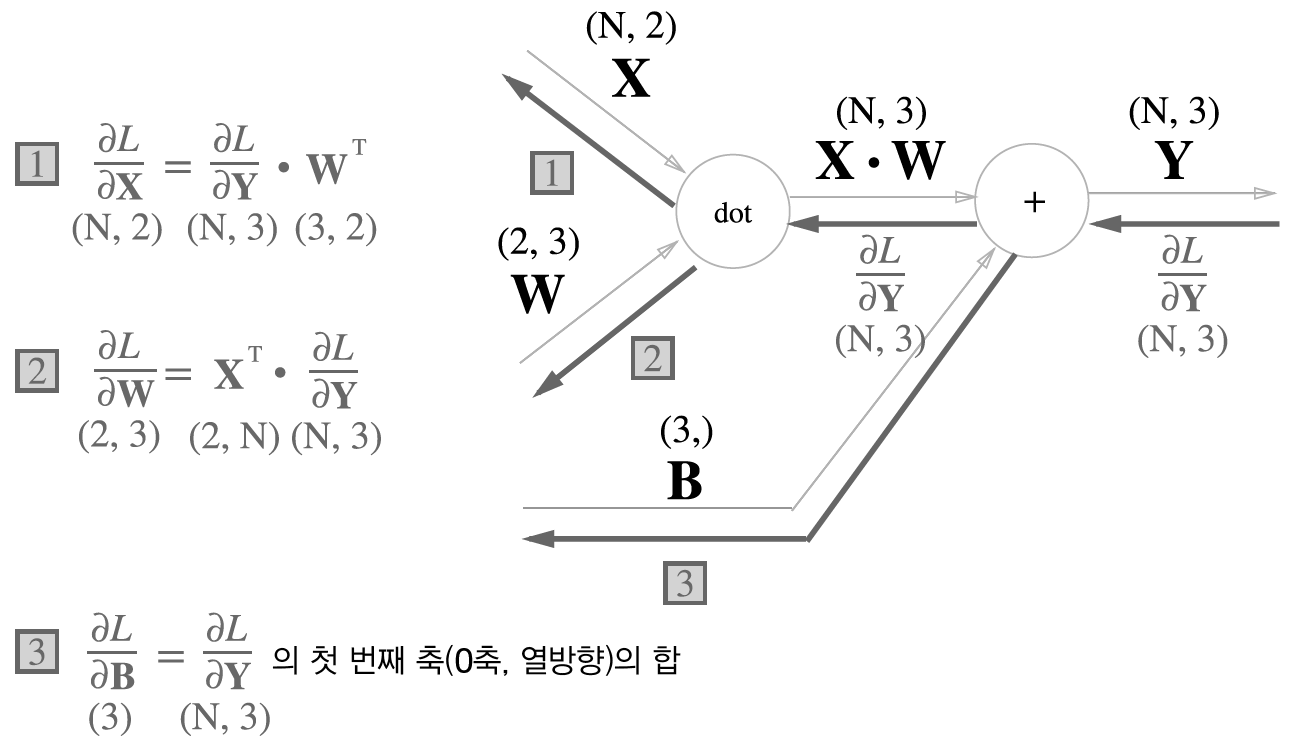

# Softmax + Loss 오차역전파

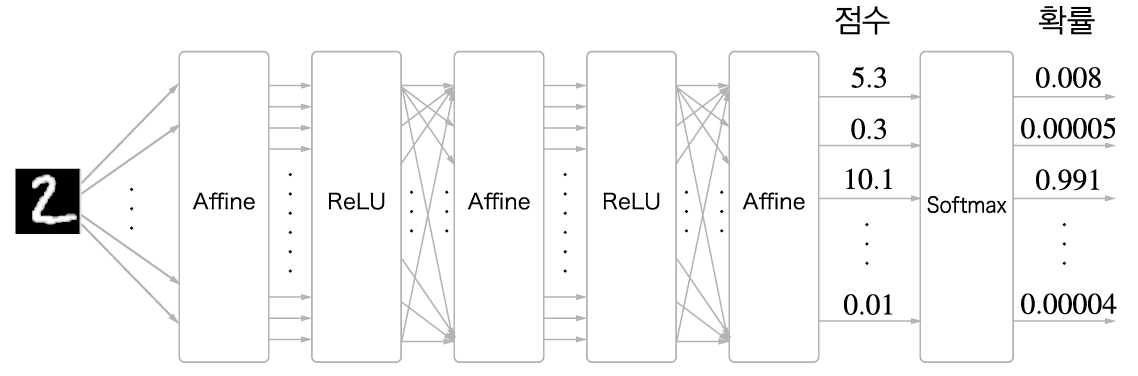

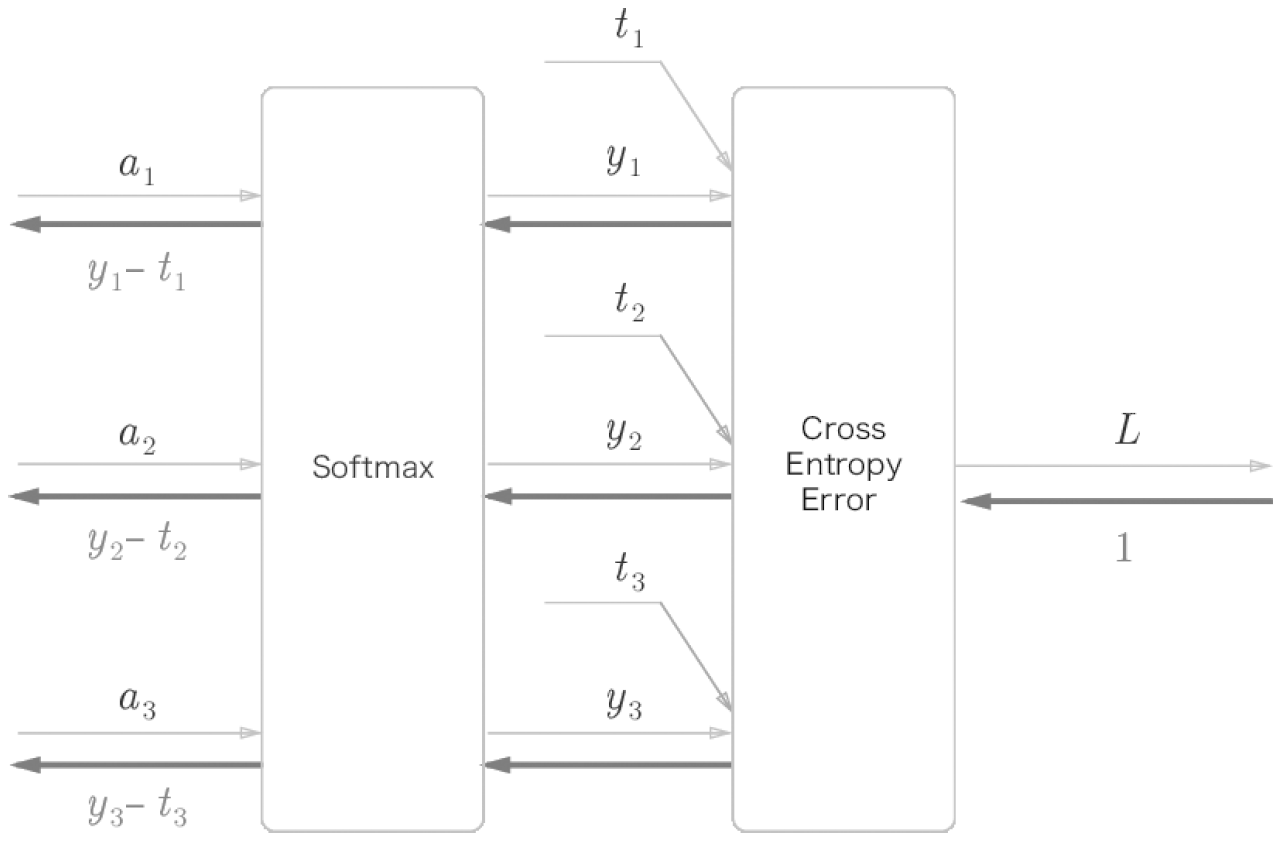

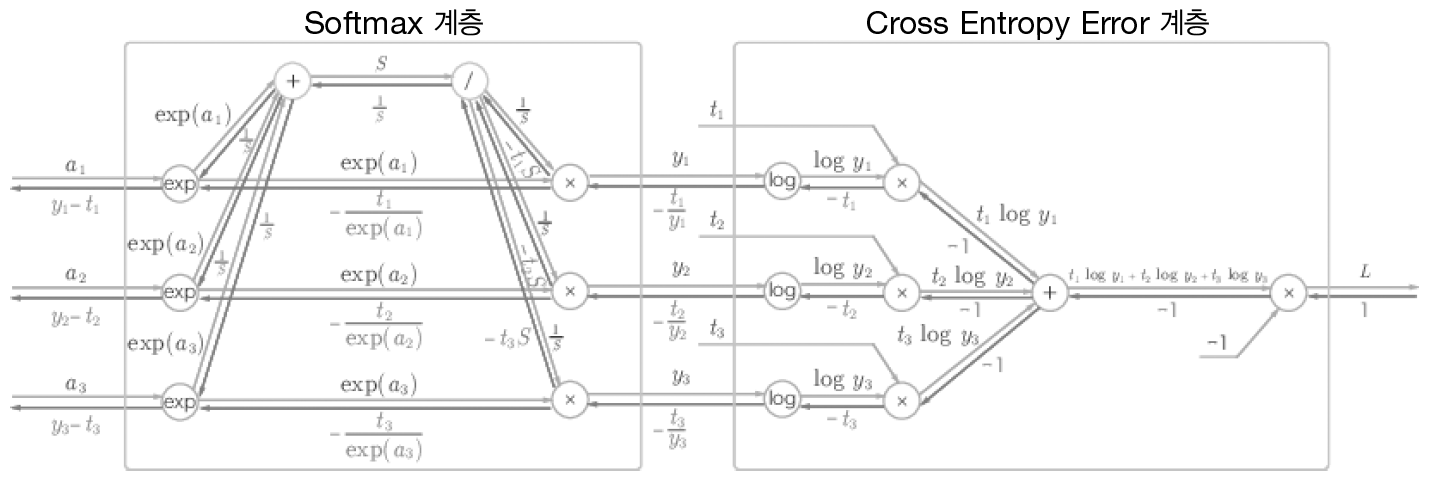

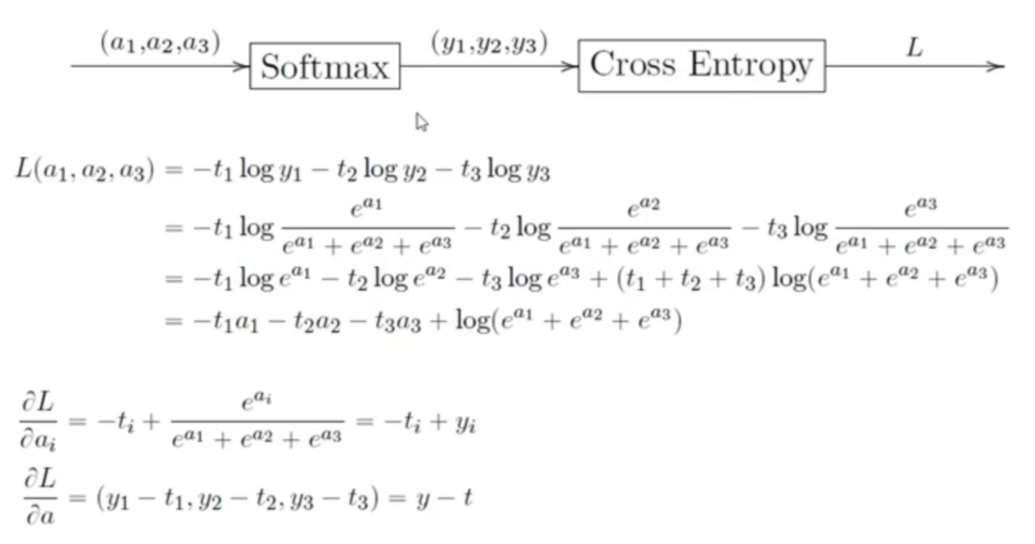

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

# 오차 역전파 총정리

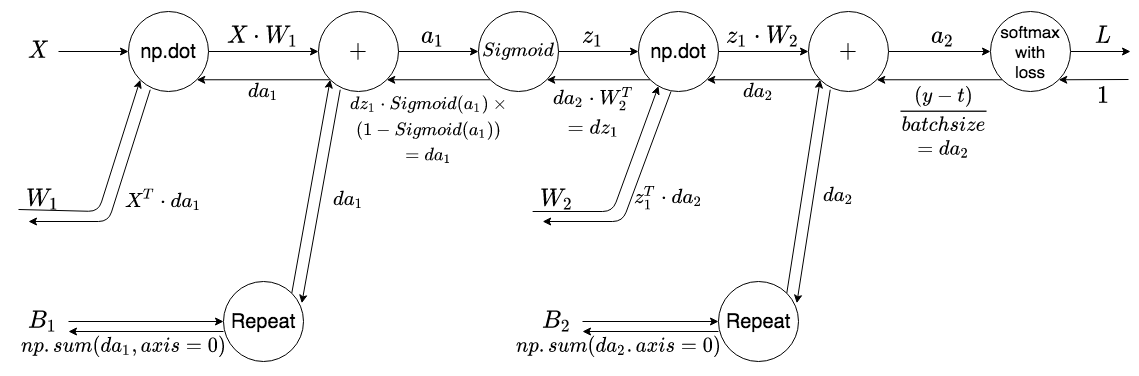

In [ ]:
from collections import OrderedDict

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [ ]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [ ]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 :
            t = np.argmax(t, axis=1)
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        self.loss(x,t)

        #backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse() # Affine2 -> Relu -> Affine1
        for layer in layers:
            dout = layer.backward(dout)

        grads={}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

In [ ]:
from drive.MyDrive.data.mnist import load_mnist

1. 수치미분과 오차역전파의 시간 측정

2. 두 방식의 오차 확인

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [ ]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [ ]:
x_batch = x_train[:3]
t_batch = t_train[:3]

In [ ]:
x_batch.shape, t_batch.shape

((3, 784), (3, 10))

In [ ]:
%timeit network.numerical_gradient(x_batch, t_batch)

12.5 s ± 1.67 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit network.gradient(x_batch, t_batch)

306 µs ± 72.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

In [ ]:
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key, ' : ', diff)

W1  :  2.8265829466921956e-13
b1  :  1.067441208124284e-12
W2  :  1.0319075129973377e-12
b2  :  1.2012612016221168e-10


# MNIST 데이터 분류를 위한 클라이언트 작성

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [ ]:
x_train.shape, t_train.shape, x_test.shape, t_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [ ]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.10555 0.1106
0.9038 0.9074
0.9230166666666667 0.9257
0.9351166666666667 0.9325
0.94335 0.9428
0.9497 0.9465
0.9546833333333333 0.951
0.9588333333333333 0.9547
0.95935 0.9558
0.9646 0.9602
0.9682833333333334 0.9615
0.9678166666666667 0.9627
0.9711666666666666 0.9646
0.9736333333333334 0.9645
0.9749333333333333 0.9664
0.9758833333333333 0.9667
0.9782 0.9698


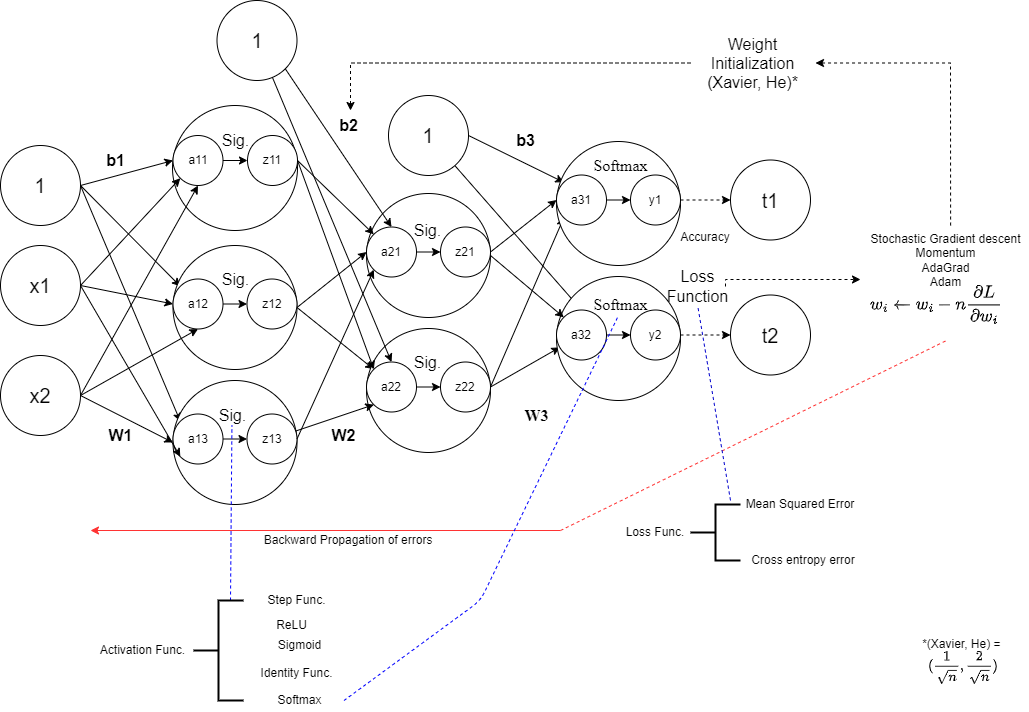

#colab 에서 GPU 사용하기

In [ ]:
import tensorflow as tf
import timeit
import numpy as np

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi

Tue Nov  7 05:11:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |    359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!head -n 18 /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.184
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13


In [ ]:
!head /proc/meminfo

MemTotal:       13294208 kB
MemFree:         7935272 kB
MemAvailable:   10905860 kB
Buffers:           88492 kB
Cached:          3091732 kB
SwapCached:            0 kB
Active:           822416 kB
Inactive:        4150212 kB
Active(anon):       1340 kB
Inactive(anon):  1804356 kB


# GPU, CPU  프로그램 테스트

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

def cpu():
    with tf.device('/cpu:0'):
        random_image_cpu = tf.random.normal((100, 100, 100, 3))
        net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
def gpu():
    with tf.device('/device:GPU:0'):
        random_image_gpu = tf.random.normal((100, 100, 100, 3))
        net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)

cpu()
gpu()

print('=='*50)
print('CPU : ')
cpu_time = timeit.timeit('cpu()', number=10, setup='from __main__ import cpu')
print(cpu_time)
print('GPU : ')
gpu_time = timeit.timeit('gpu()', number=10, setup='from __main__ import gpu')
print(gpu_time)

CPU : 
4.204692238999996
GPU : 
0.08549222900001041


In [ ]:
cpu_time/gpu_time

49.18215711745549

with tf.device('/device:GPU:0') 없이 GPU 연산 수행 여부

In [ ]:
def gpu_1():
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)

In [ ]:
gpu_time_list = []
for i in range(30):
    gpu_time = timeit.timeit('gpu_1()', number=10, setup='from __main__ import gpu_1')
    print(gpu_time)
    gpu_time_list.append(gpu_time)
print('mean : ', np.mean(gpu_time_list))

0.08300434100010534
0.0797005760000502
0.07714758399970378
0.06501359799995043
0.060811176000242995
0.06344619799983775
0.11154114700002538
0.07021667900016837
0.08522811800003183
0.10732951699992554
0.15065768399972512
0.07262678300003245
0.06958482300024116
0.10675263900020582
0.09082014500017976
0.07957190900015121
0.11288312700025926
0.07606052900018767
0.059229731999948854
0.061596463000114454
0.06112862500003757
0.061012833999939176
0.06020870800011835
0.06075943099995129
0.0604216209999322
0.06318773999964833
0.06186727000022074
0.06287163300021348
0.06241899499991632
0.06649972199966214
mean :  0.07678664490002424


In [ ]:
import keras.layers

In [ ]:
def gpu_2():
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = keras.layers.Conv2D(32, 7)(random_image_gpu)

In [ ]:
gpu_time_list = []
for i in range(30):
    gpu_time = timeit.timeit('gpu_2()', number=10, setup='from __main__ import gpu_2')
    print(gpu_time)
    gpu_time_list.append(gpu_time)
print('mean : ', np.mean(gpu_time_list))

0.10252565899963884
0.0930421899997782
0.08932388599987462
0.08743123500016736
0.16049960200007263
0.07717092400025649
0.09306825399971785
0.07383244999982708
0.09338075699997717
0.0597163620000174
0.06128599000021495
0.06078228400019725
0.06412263899983373
0.06213754300006258
0.062488009000389866
0.06359916299970791
0.06287051999970572
0.0632526979998147
0.06200812800034328
0.060440553999796975
0.06444335600008344
0.06135356699996919
0.06146049500011941
0.06229200999996465
0.06417433100023118
0.06134851900014837
0.06334456800004773
0.06092140200007634
0.06278276700004426
0.061087294000117254
mean :  0.07253957186667322


In [ ]:
cpu_time_list = []
for i in range(30):
    cpu_time = timeit.timeit('cpu()', number=10, setup='from __main__ import cpu')
    print(cpu_time)
    cpu_time_list.append(cpu_time)
print('mean : ', np.mean(cpu_time_list))

4.454418357000122
3.205415513999924
3.2616389710001386
4.516723477999676
4.201515929000379
3.3526664320002055
3.2445776469999146
4.8410619119999865
4.262082125999768
5.516070593000222
4.708986502999778
3.9405374180000763
3.2518607619999784
3.2930589040001905
4.940713013999812
3.55670459699968
3.30530436700019
3.282438021999951
5.281150114999946
3.1974343339998086
3.2211672560001716
3.2575308550003683
5.358676817999822
3.3041010689998984
3.3270381359998282
3.446855956000036
5.231575141000121
3.2874358430003667
3.2800593289998687
3.5952599600000212
mean :  3.897468645266675


#그래픽카드, CUDA toolkit, cuDNN, python, tensorflow : 5개의 버전 맞추기

    1. conda createn -n gpu python=3.8.10
    2. conda activate gpu
    3. pip install tensorflow==2.9.1 tensorflow-io-gcs-filesystem==0.26.0
    4. python gpu_test.py > gpu_test_result

#keras 해보기

In [ ]:

from keras.datasets import mnist
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical

def get_data():
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    train_images=train_images.reshape((60000, 784))
    train_images=train_images.astype('float32')/255

    test_images=test_images.reshape((10000, 784))
    test_images=test_images.astype('float32')/255
    #print(test_labels[:10])

    train_labels = to_categorical(train_labels) # train_labels=[2,3,4...] -> [0,0,1,0,0,...]
    test_labels = to_categorical(test_labels)
    return (train_images, train_labels), (test_images, test_labels)

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Writing mnist_keras_module.py


In [ ]:

import mnist_keras_module as MKM
#from mnist import load_mnist
import history_plot as hp

(train_images, train_labels), (test_images, test_labels) = MKM.get_data()
#(train_images, train_labels), (test_images, test_labels) = load_mnist(normalize=True, one_hot_label=True)

model = MKM.build_model()

history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc, test_loss)

hp.history_plot(history)

Writing mnist_keras_client.py


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

def set_val_train(hist_dict):
    on_off1 = hist_dict.get('val_loss')
    on_off2 = hist_dict.get('accuracy')
    if on_off1:
        if on_off2:
            train_loss = hist_dict['loss']
            train_acc  = hist_dict['accuracy']
            val_loss = hist_dict['val_loss']
            val_acc  = hist_dict['val_accuracy']
        else:
            train_loss = hist_dict['loss']
            train_acc  = hist_dict['acc']
            val_loss = hist_dict['val_loss']
            val_acc  = hist_dict['val_acc']
    else:
        if on_off2:
    	    train_loss = hist_dict['loss']
    	    train_acc  = hist_dict['accuracy']
        else:
    	    train_loss = hist_dict['loss']
    	    train_acc  = hist_dict['acc']
        shapes = len(train_acc)
        nan_array = np.empty((shapes,))
        nan_array.fill(np.nan)
        val_loss = nan_array
        val_acc = nan_array
    return train_loss, train_acc, val_loss, val_acc

def history_plot(history, png_file_name='loss_acc_plot.png'):
	hist_dict = history.history
	train_loss,train_acc,val_loss,val_acc = set_val_train(hist_dict)
	x = range(1, len(train_acc)+1)
	fig, loss_ax = plt.subplots(figsize=(8,6))
	acc_ax = loss_ax.twinx()
	loss_ax.plot(x,train_loss, 'y', label='train loss')
	loss_ax.plot(x,val_loss, 'r', label='validation loss')
	acc_ax.plot(x, train_acc, 'b', label='train acc')
	acc_ax.plot(x, val_acc, 'g', label='val acc')
	for label in acc_ax.get_yticklabels(): # y축 tick 색깔 지정
		label.set_color("blue")
	loss_ax.set_xlabel('epoch',size=20)
	loss_ax.set_ylabel('loss',size=20)
	acc_ax.set_ylabel('accuray', color='blue',size=20)
	loss_ax.legend(loc='upper right')
	acc_ax.legend(loc='lower right')
	fig.savefig(png_file_name)
	plt.show()

Writing history_plot.py


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.2649 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1062 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9841
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9792
0.979200005531311 0.06491635739803314


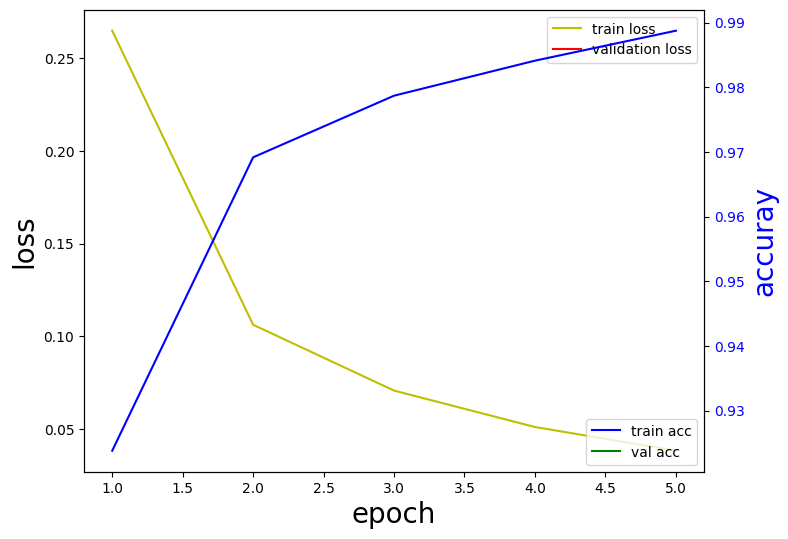

<Figure size 640x480 with 0 Axes>

In [ ]:
%run mnist_keras_client.py

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 값 복원
        it.iternext()

    return grad

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        return dx

In [ ]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [ ]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [ ]:
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()                                         ###
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2']) ###

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim !=1 :
            t=np.argmax(t, axis=1)
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        self.loss(x, t)

        dout=1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        return grads

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [ ]:
from drive.MyDrive.data.mnist import load_mnist

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(784, 50, 10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    #갱신 = update
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.14158333333333334 0.1409
0.8996166666666666 0.9043
0.9222166666666667 0.9244
0.9362666666666667 0.9356
0.9426833333333333 0.9393
0.9509 0.9475
0.9539666666666666 0.9489
0.9595333333333333 0.9547
0.9633666666666667 0.956
0.9667333333333333 0.9596
0.96925 0.9621
0.97105 0.9641
0.97195 0.9652
0.9740333333333333 0.9643
0.97475 0.9651
0.97685 0.9677
0.9766666666666667 0.9679


#Optimizer : 확률적 경사하강법 (SGD)

\begin{equation*}
W \leftarrow W - \eta \frac{\partial L}{\partial W}
\end{equation*}

\begin{equation*}
W : 갱신할 매개변수
\end{equation*}
\begin{equation*}
\frac{\partial L}{\partial W} : 손실 함수의 기울기
\end{equation*}
\begin{equation*}
\eta : 학습률, 미리 정해서 사용
\end{equation*}

In [ ]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key]

Optimizer : 최적화 모듈을 의미

매개변수 갱신은 optimizer가 책임지고 수행. optimizer에 매개변수와 기울기 정보만 넘기면 됨

최적화를 담당하는 클래스를 분리 구현하면 기능을 모듈화하기 좋음

모멘텀 최적화 기법 역시 update(params, grads)라는 공통의 메서드를 갖도록 구현

optimizer = SGD 문장을 optimizer = Momentum 으로만 변경하면 됨

# optimizer가 필요한 이유

\begin{equation*}
f(x,y) = \frac{1}{20} x^2 + y^2
\end{equation*}

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-10, 10, 0.5)
Y = np.arange(-10, 10, 0.5)
XX, YY = np.meshgrid(X, Y)
ZZ = (1 / 20) * XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot')

<Figure size 640x480 with 0 Axes>

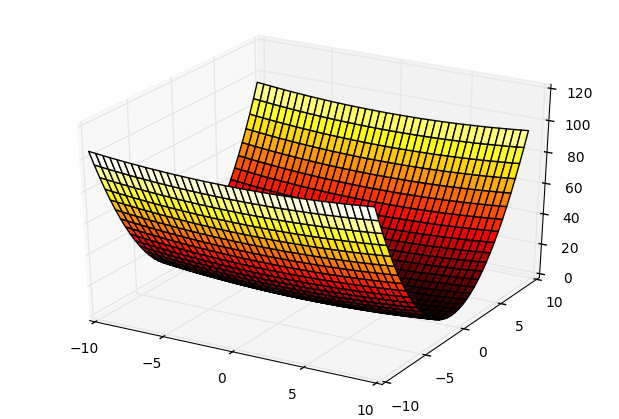

(-10.0, 10.0)

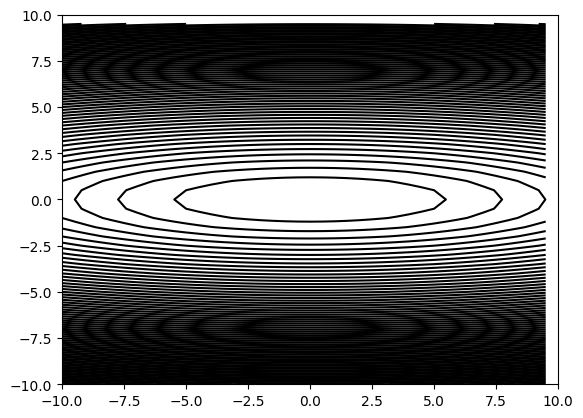

In [ ]:
plt.contour(XX, YY, ZZ, 100, colors='k')
plt.ylim(-10, 10)
plt.xlim(-10, 10)

In [ ]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

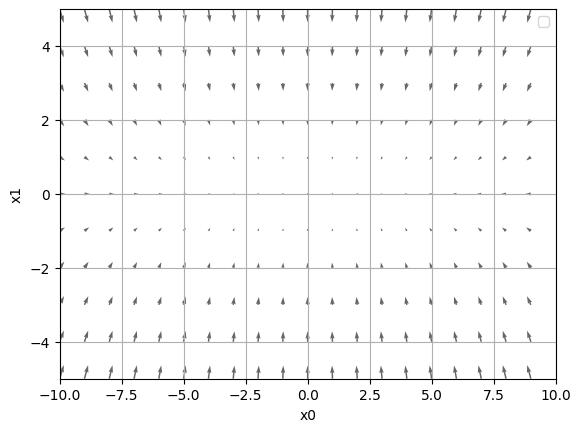

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

x0 = np.arange(-10, 10, 1)
x1 = np.arange(-10, 10, 1)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([(1/(20**0.5))*X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-10, 10])
plt.ylim([-5, 5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

#Optimizer : 모멘텀 (Momentum, 운동량)

\begin{equation*}
v_n \leftarrow \alpha v - \eta \frac{\partial{L}}{\partial{W}}
\end{equation*}

\begin{equation*}
W \leftarrow W + v
\end{equation*}

\begin{equation*}
W : 갱신할 매개변수
\end{equation*}
\begin{equation*}
\frac{\partial L}{\partial W} : 손실 함수의 기울기
\end{equation*}
\begin{equation*}
\eta : 학습률, 미리 정해서 사용
\end{equation*}

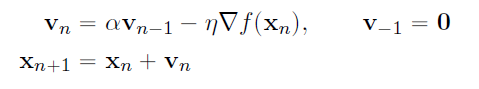

In [ ]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

#Optimizer : AdaGrad

학습률 감소(learning rate decay) : 학습을 진행하면서 학습률을 점차 줄여가는 방법

개별 매개변수에 적응적으로(adative) 학습률을 조정하면서 학습을 진행

\begin{equation*}
h \leftarrow h + \frac{\partial{L}}{\partial{W}} \odot \frac{\partial{L}}{\partial{W}}
\end{equation*}

\begin{equation*}
W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\partial{L}}{\partial{W}}
\end{equation*}

\begin{equation*}
W : 갱신할 매개변수
\end{equation*}
\begin{equation*}
\frac{\partial L}{\partial W} : 손실 함수의 기울기
\end{equation*}
\begin{equation*}
\eta : 학습률, 미리 정해서 사용
\end{equation*}

In [ ]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key])+1e-7)

# RMSProp의 h를 구하는 방법을

$$
h \leftarrow \alpha h + (1-\alpha) ({\partial L \over \partial w})^2
$$

# Optimizer : Adam

Adam = Momentum + AdaGrad(RMSProp)

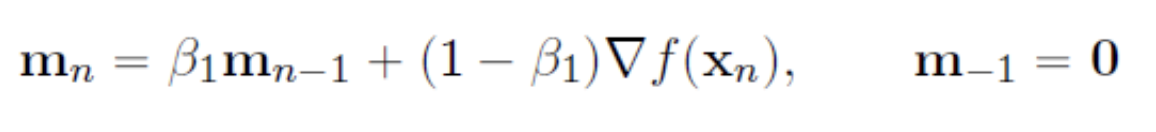

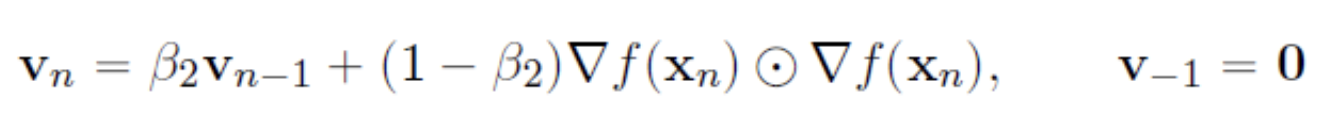

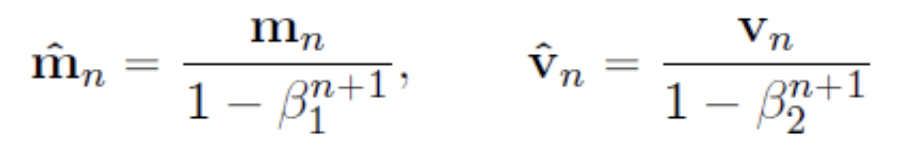

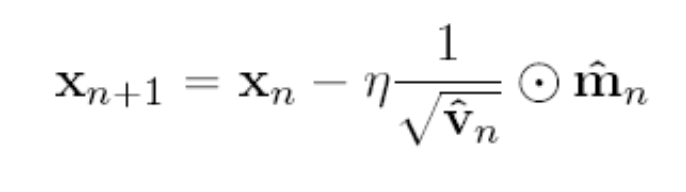

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for key in params.keys():

            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)